In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def cbcRatePosteriorNull(eps,rateAxis):
    """
    Returns the value of the posterior on the cbc Rate for Lambda=0
    """
    return eps*exp(-rateAxis*eps)

def rateFromTheta(theta,grb_efficiency,grbRate):
    """
    Returns Rcbc = Rgrb / (1-cos(theta))
    """
    return grbRate / ( grb_efficiency*(1.-cos(theta * pi / 180)) )

def compute_jacobian(grbRate,grb_efficiency,theta):
    """
    Compute the Jacboian for the transformation from rate to angle
    """
    denom=grb_efficiency*(cos(theta * pi/180)-1)
    return abs(2*grbRate * sin(theta * pi / 180) / denom**2)

def compute_beta(theta):
    """
    Compute v/c, assuming theta ~ 1/Lorentz factor
    """
    gamma = 1.0/(theta * pi/180)
    beta = sqrt(1 - 1./gamma**2)
    return beta,gamma

In [4]:
import numpy as np
from scipy import stats

In [5]:
eff = np.arange(0,1,0.001)
prior_flat = np.ones(len(eff))
prior_jeff_pdf = stats.beta(0.5,0.5)
prior_jeff = prior_jeff_pdf.pdf(eff)

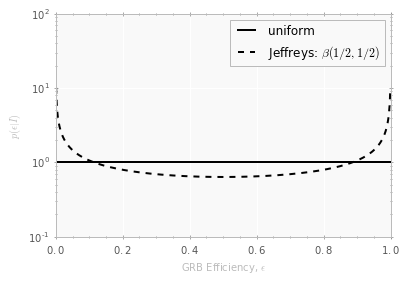

In [8]:
f, ax = plt.subplots()
ax.semilogy(eff, prior_flat, label='uniform', color='k')
ax.semilogy(eff, prior_jeff, label=r'Jeffreys: $\beta(1/2,1/2)$', color='k',
        linestyle='--')
ax.set_xlabel('GRB Efficiency, $\epsilon$')
ax.set_ylabel('$p(\epsilon|I)$')
ax.legend()
ax.minorticks_on()

In [9]:
prior_names={'delta,0.1':'delta_0p1', 'delta,0.5':'delta_0p5',
'delta,1.0':'delta_1', 'uniform':'uniform','jeffreys':'jeffreys'}